<a href="https://colab.research.google.com/github/silvererudite/ML_algos_onSomeDatasets/blob/master/GSR_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns
plt.figure(figsize=(15,10))
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

<Figure size 1080x720 with 0 Axes>

In [38]:
data=pd.read_csv("feature_GSR.csv")

In [39]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,Valence,Arousal,Dominance,Likings
0,1765.0,1585.0,197.0,3338.209961,152.7,573.0,13.9,3337.068393,1668.534197,1724.0,19.7,138.8,1,1,1,1
1,921.0,450.0,194.0,2232.874914,60.8,302.0,35.2,2221.738415,1110.869207,802.0,19.4,25.6,1,1,1,1
2,3051.0,635.0,267.0,4475.143385,198.7,387.0,161.9,4459.726703,2229.863351,2254.0,26.7,36.8,1,1,1,1
3,763.0,667.0,235.0,1390.800127,50.0,367.0,6.8,1388.201911,694.100956,735.0,23.5,43.2,1,0,1,1
4,154.0,127.0,115.0,101.007542,-6.0,58.0,-7.2,83.137709,41.568854,55.0,11.5,1.2,1,0,1,1


In [40]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,Valence,Arousal,Dominance,Likings
count,941.000000,941.000000,941.000000,941.000000,941.000000,941.00000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000
mean,777.044633,585.113709,134.569607,2279.744611,44.313390,317.12221,-0.741020,1993.170153,996.585076,577.703507,13.456961,45.054410,0.584485,0.591923,0.645058,0.650372
std,1357.950468,1095.865682,216.721826,6133.417145,99.891565,551.72826,45.041114,5984.011960,2992.005980,1064.987450,21.672183,102.482016,0.493073,0.491739,0.478750,0.477106
min,2.000000,1.000000,0.000000,2.037350,-98.000000,0.00000,-423.600000,0.062500,0.031250,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,64.000000,26.000000,0.000000,39.888761,0.500000,6.00000,0.000000,15.031222,7.515611,49.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000
50%,218.000000,137.000000,100.000000,273.516046,11.600000,112.00000,1.700000,116.613908,58.306954,195.000000,10.000000,6.200000,1.000000,1.000000,1.000000,1.000000
75%,833.000000,655.000000,194.000000,1762.443960,34.700000,378.00000,9.500000,1307.709358,653.854679,639.000000,19.400000,38.800000,1.000000,1.000000,1.000000,1.000000
max,7887.000000,7025.000000,2524.000000,59541.684022,734.500000,4003.00000,180.400000,59493.673061,29746.836531,7767.000000,252.400000,682.400000,1.000000,1.000000,1.000000,1.000000


In [41]:
data.isnull().sum()

0            0
1            0
2            0
3            0
4            0
5            0
6            0
7            0
8            0
9            0
10           0
11           0
Valence      0
Arousal      0
Dominance    0
Likings      0
dtype: int64

In [42]:
def knn_classifier():
    X=data.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values
    y=data['Valence'].values
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    	
    # KNN
    clf = KNeighborsClassifier(n_neighbors=7, leaf_size=3, p=1)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    #print(cm)
    plot_confusion_matrix(clf, X_test, y_test) 
    print("Classification report of valence")
    print(classification_report(y_test, y_predict))
    print("Accuracy score of Valence ")
    print(accuracy_score(y_test, y_predict)*100)
    
    
    
    ###############################################################################
    
    X=data.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values
    y=data['Arousal'].values
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    	
    # KNN
    clf = KNeighborsClassifier(n_neighbors=7)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    #print(cm)
    plot_confusion_matrix(clf, X_test, y_test) 
    print("Accuracy score of Arousal ")
    print(accuracy_score(y_test, y_predict)*100)

Classification report of valence
              precision    recall  f1-score   support

           0       0.45      0.30      0.36        81
           1       0.58      0.73      0.65       108

    accuracy                           0.54       189
   macro avg       0.52      0.51      0.50       189
weighted avg       0.53      0.54      0.52       189

Accuracy score of Valence 
54.4973544973545
Accuracy score of Arousal 
53.43915343915344


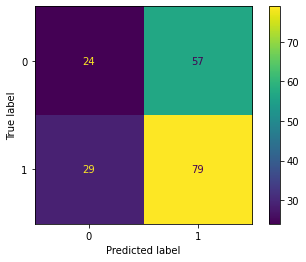

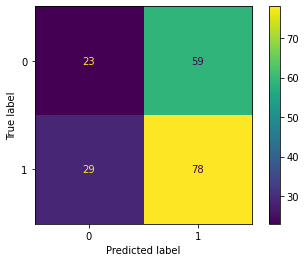

In [43]:
knn_classifier()

Accuracy score of valence test KNN-PCA
50.264550264550266
Accuracy score of Arousal test KNN-PCA
56.613756613756614


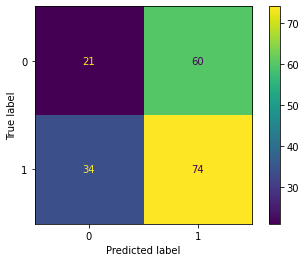

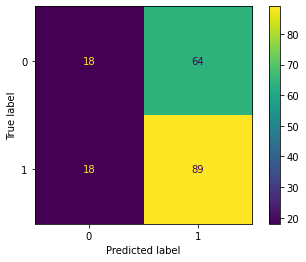

In [44]:
def knn_classifier_pca():
    X=data.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values
    y=data['Valence'].values
    # PCA to select features
    pca = PCA(n_components=10, svd_solver='full')
    pca.fit(X)
    X = pca.transform(X)
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
       	
    # KNN classsifier
    clf = KNeighborsClassifier(n_neighbors=7, leaf_size=3, p=1)
    trained_model=clf.fit(X_train,y_train)
    trained_model.fit(X_train,y_train )
    
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    #print(cm)
    plot_confusion_matrix(clf, X_test, y_test) 
    
    print("Accuracy score of valence test KNN-PCA")
    
    print(accuracy_score(y_test, y_predict)*100)
    # print("AUC score for Valence")
    # print(roc_auc_score(y_test, y_predict))
    
    
    ########################################################################
    X=data.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values
    y=data['Arousal'].values
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
        
    # PCA to select features
    pca = PCA(n_components=10, svd_solver='full')
    pca.fit(X)
    X = pca.transform(X)
        	
    # KNN classsifier
    clf = KNeighborsClassifier(n_neighbors=9)
    trained_model=clf.fit(X_train,y_train)
    trained_model.fit(X_train,y_train )
    
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    #print(cm)
    plot_confusion_matrix(clf, X_test, y_test) 
    
    print("Accuracy score of Arousal test KNN-PCA")
    print(accuracy_score(y_test, y_predict)*100)

knn_classifier_pca()   
    

Accuracy score of Valence 
53.96825396825397
Accuracy score of Arousal 
57.67195767195767


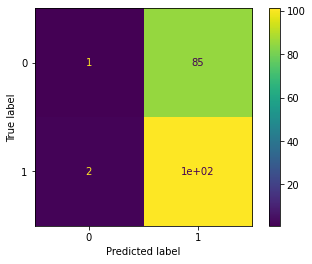

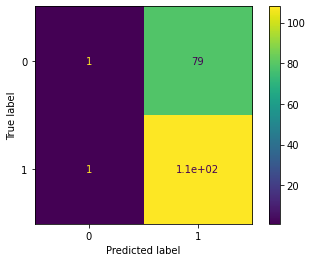

In [45]:
def svm_classifier(): 
    X=data.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values
    y=data['Valence'].values
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    	
    # SVM Classifier
    clf = SVC(kernel = 'rbf', random_state = 42)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    #print(cm)
    plot_confusion_matrix(clf, X_test, y_test) 
    
    print("Accuracy score of Valence ")
    print(accuracy_score(y_test, y_predict)*100)
    
    ###############################################################
    
    X=data.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values
    y=data['Arousal'].values
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    	
    # SVM Classifier
    clf = SVC(kernel = 'rbf', random_state = 42)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    #print(cm)
    plot_confusion_matrix(clf, X_test, y_test) 
    print("Accuracy score of Arousal ")
    print(accuracy_score(y_test, y_predict)*100)
svm_classifier()

Applying PCA to select features 

Split the data into training/testing sets 

Feature Scaling 

Applying SVM classifier 

Accuracy score of Valence SVM-PCA
59.25925925925925
Applying PCA to select features 

Split the data into training/testing sets 

Feature Scaling 

Applying SVM classifier 

57.14285714285714


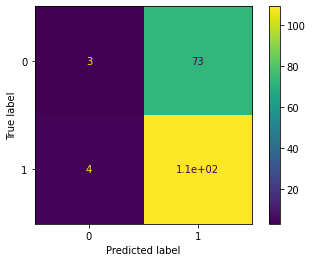

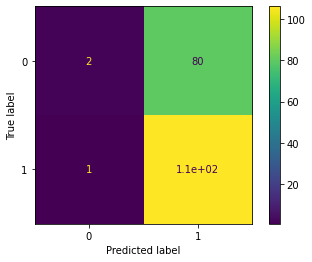

In [46]:
def svm_classifier_pca():
    X=data.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values
    y=data['Valence'].values
    print("Applying PCA to select features \n")
    
    # PCA to select features
    pca = PCA(n_components=10, svd_solver='full')
    pca.fit(X)
    X = pca.transform(X)
    #explained_variance=pca.explained_variance_ratio_
    
   
    print("Split the data into training/testing sets \n")

    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test_0 = train_test_split(X, y, test_size=0.2, random_state=4)
     
    
    print("Feature Scaling \n")
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    
    
    print("Applying SVM classifier \n")
    # SVM Classifier
    clf = SVC()
    clf.fit(X_train, y_train)
    y_predict_0 = clf.predict(X_test)
    cm = confusion_matrix(y_test_0, y_predict_0)
    #print(cm)
    plot_confusion_matrix(clf, X_test, y_test_0) 
    print("Accuracy score of Valence SVM-PCA")
    print(accuracy_score(y_test_0, y_predict_0)*100)
    
    #######################################################################
    
    X=data.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values
    y=data['Arousal'].values
    
    print("Applying PCA to select features \n")
    
    # PCA to select features
    pca = PCA(n_components=10, svd_solver='full')
    pca.fit(X)
    X = pca.transform(X)
    #explained_variance=pca.explained_variance_ratio_
    
   
    print("Split the data into training/testing sets \n")
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test_0 = train_test_split(X, y, test_size=0.2, random_state=4)
     
    
    print("Feature Scaling \n")
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    
    print("Applying SVM classifier \n")
    # SVM Classifier
    clf = SVC()
    clf.fit(X_train, y_train)
    y_predict_0 = clf.predict(X_test)
    cm = confusion_matrix(y_test_0,y_predict_0)
    #print(cm)
    plot_confusion_matrix(clf, X_test, y_test_0) 
    print(accuracy_score(y_test_0, y_predict_0)*100)
    
svm_classifier_pca()

In [47]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# import time
# import matplotlib.pyplot as plt 
# from sklearn import model_selection
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier

# def cross_validate0():
    
#     # Get Data
#     X=data.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values
#     y=data['Valence'].values
    
   
    
#     # Split the data into training/testing sets
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    
#      # Feature Scaling
#     from sklearn.preprocessing import StandardScaler
#     sc = StandardScaler()
#     X_train = sc.fit_transform(X_train)
#     X_test = sc.transform(X_test)
    
#      #principle component analysis
#     from sklearn.decomposition import PCA
#     pca = PCA(n_components=20)
#     X_train = pca.fit_transform(X_train)
#     X_test = pca.fit_transform(X_test)
    
   
    	
#     models = []
#     models.append(('LR', LogisticRegression(random_state = 0)))
#     models.append(('SVC', SVC(kernel = 'rbf', random_state = 0)))
     
#     models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
#     models.append(('DT', DecisionTreeClassifier(random_state = 0)))
    
#     scoring = 'accuracy'
    
#     # Cross Validate
#     results = []
#     names = []
#     timer = []
#     print('Model | Mean of CV | Std. Dev. of CV | Time')
#     for name, model in models:
#         start_time = time.time()
#         kfold = model_selection.KFold(n_splits=5, random_state=0)
#         cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
#         t = (time.time() - start_time)
#         timer.append(t)
#         results.append(cv_results)
#         names.append(name)
#         msg = "%s: %f (%f) %f s" % (name, cv_results.mean(), cv_results.std(), t)
#         print(msg)
    
        
#     models = []
#     for i in range(1,41): 
#         models.append(('KNN', KNeighborsClassifier(n_neighbors=i)))
#         results = []
#         names = []
#         timer = []
#         cv_knn = []
        
#         print('Model  | Mean of CV | Std. Dev. of CV | Time',i)
#         for name, model in models:
#             start_time = time.time()
#             kfold = model_selection.KFold(n_splits=4, random_state=42)
#             cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
#             t = (time.time() - start_time)
#             timer.append(t)
#             results.append(cv_results)
#             names.append(name)
#             msg = "%s: %f (%f) %f s" % (name, cv_results.mean(), cv_results.std(), t)
                
#             cv_knn.append(cv_results.mean())
#         print(msg)
        
#     print('\nmaximum accuracy for valence is',max(cv_knn))

    
#     plt.figure(figsize=(12, 6))  
#     plt.plot(range(1, 41), cv_knn, color='red', linestyle='dashed', marker='o',  
#              markerfacecolor='blue', markersize=10)
#     plt.title('mean cv_results of  K Value for Valence')  
#     plt.xlabel('K Value')  
#     plt.ylabel('Mean cv_result')  
    
        

# cross_validate0()

Accuracy score of Valence 
55.55555555555556
Accuracy score of Arousal 
53.96825396825397


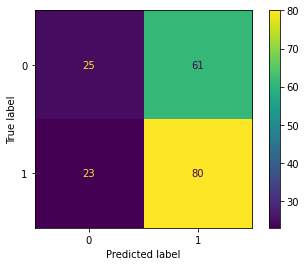

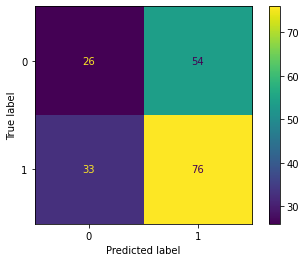

In [48]:
def adaBoost_classifier(): 
    X=data.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values
    y=data['Valence'].values
    # PCA to select features
    # pca = PCA(n_components=10, svd_solver='full')
    # pca.fit(X)
    # X = pca.transform(X)
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    	
    # SVM Classifier
    
    clf = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=0)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    #print(cm)
    plot_confusion_matrix(clf, X_test, y_test) 
    
    print("Accuracy score of Valence ")
    print(accuracy_score(y_test, y_predict)*100)
    
    ###############################################################
    
    X=data.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values
    y=data['Arousal'].values
    # PCA to select features
    pca = PCA(n_components=10, svd_solver='full')
    pca.fit(X)
    X = pca.transform(X)
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    	
    # SVM Classifier
    clf = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=0)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    #print(cm)
    plot_confusion_matrix(clf, X_test, y_test) 
    print("Accuracy score of Arousal ")
    print(accuracy_score(y_test, y_predict)*100)

adaBoost_classifier()